## Observations and Insights 

In [129]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
# pd.concat([df1, df4.reindex(df1.index)], axis=1)

#mouse_data_df = pd.concat([mouse_metadata, study_results.reindex(mouse_metadata.index)], axis=1)
#mouse_data_df

#frames = [mouse_metadata, study_results]
# result_df = pd.concat(frames)
merge_result_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
merge_result_df

# objs = (mouse_metadata, study_results)

# merge_frames_df = pd.concat(objs, axis=0, join='outer', ignore_index=False, keys=None,
#           levels=None, names=None, verify_integrity=False, copy=True)
# merge_frames_df

# #dup_drop = merge_frames_df
# mouse_metadata['Mouse ID']=='s185'

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [130]:
merge_result_df.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,12.814580,25.662441,19.572108,50.448381,1.021659
std,7.189592,3.921622,14.079460,8.894722,1.137974
min,1.000000,15.000000,0.000000,22.050126,0.000000
25%,7.000000,25.000000,5.000000,45.000000,0.000000
50%,13.000000,27.000000,20.000000,48.951474,1.000000
75%,20.000000,29.000000,30.000000,56.292200,2.000000
max,24.000000,30.000000,45.000000,78.567014,4.000000


In [131]:
# Checking the number of mice in the DataFrame.
combi_total_mice = merge_result_df["Mouse ID"].count()
combi_total_mice

#Unique Mouse ID = 249
# combi_total_mice.nunique()

1893

In [132]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMouseDF = merge_result_df[merge_result_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicateMouseDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [133]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMouseDF.describe()

,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
count,5.0,5.0,5.000000,5.000000,5.000000
mean,21.0,26.0,10.000000,50.110118,0.200000
std,0.0,0.0,7.905694,4.012413,0.447214
min,21.0,26.0,0.000000,45.000000,0.000000
25%,21.0,26.0,5.000000,47.570392,0.000000
50%,21.0,26.0,10.000000,49.880528,0.000000
75%,21.0,26.0,15.000000,53.442020,0.000000
max,21.0,26.0,20.000000,54.657650,1.000000


In [134]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_df = merge_result_df.drop_duplicates(subset='Mouse ID', keep="last")
clean_mouse_df['Mouse ID'].count()
clean_mouse_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [135]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_count = clean_mouse_df["Mouse ID"].count()
cleaned_mouse_count

249

In [136]:
drug_Regimen = clean_mouse_df.groupby("Drug Regimen")
#first item in group
drug_Regimen.first()
#group of items
drug_Regimen.get_group("Ramicane")

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Male,21,16,45,22.050126,1
49,g791,Male,11,16,45,29.128472,1
59,s508,Male,1,17,45,30.276232,0
74,m546,Male,18,16,45,30.564625,1
84,z578,Male,11,16,45,30.638696,0
94,j913,Female,4,17,45,31.560470,1
114,n364,Male,4,17,45,31.095335,1
154,c758,Male,9,17,45,33.397653,1
174,a644,Female,7,17,45,32.978522,1
184,i177,Male,10,18,45,33.562402,3


In [137]:
# volume_mouse_df = clean_mouse_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']]
# volume_mouse_df
group_mean_volume = clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
group_mean_volume

Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.736964
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor Volume (mm3), dtype: float64

## Summary Statistics

In [138]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.

# data.groupby('month')['date'].count()
volume_mouse_df = clean_mouse_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']]
volume_mouse_df
group_mean_volume = clean_mouse_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
print(group_mean_volume)
group_median_volume = clean_mouse_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
group_median_volume
group_var_volume = clean_mouse_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
group_var_volume
group_stdev_volume = clean_mouse_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
group_stdev_volume
group_sem_volume = clean_mouse_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
print(group_sem_volume)

# summary_stats_df = mean, median, variance, standard deviation, and SEM

df2 = clean_mouse_df.groupby(['Drug Regimen'], as_index=True).agg({'Tumor Volume (mm3)':['mean'],
                                                                   'Tumor Volume (mm3)':['std'],
                                                                   'Tumor Volume (mm3)':['var'],
                                                                  'Tumor Volume (mm3)':['sem']})
df2

Drug Regimen
Capomulin    36.667568
Ceftamin     57.753977
Infubinol    58.178246
Ketapril     62.806191
Naftisol     61.205757
Placebo      60.508414
Propriva     56.736964
Ramicane     36.191390
Stelasyn     61.001707
Zoniferol    59.181258
Name: Tumor Volume (mm3), dtype: float64
Drug Regimen
Capomulin    1.143038
Ceftamin     1.673114
Infubinol    1.720591
Ketapril     1.989184
Naftisol     2.059417
Placebo      1.774934
Propriva     1.665521
Ramicane     1.134308
Stelasyn     1.940056
Zoniferol    1.753420
Name: Tumor Volume (mm3), dtype: float64


,Tumor Volume (mm3)
,sem
Drug Regimen,
Capomulin,1.143038
Ceftamin,1.673114
Infubinol,1.720591
Ketapril,1.989184
Naftisol,2.059417
Placebo,1.774934
Propriva,1.665521
Ramicane,1.134308


In [139]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# summary_stats_df = mean, median, variance, standard deviation, and SEM
summary_stats_df = pd.DataFrame({"Mean": group_mean_volume,
"Median": group_median_volume,
"Variance": group_var_volume,
"SD": group_stdev_volume,
"SEM": group_sem_volume})

summary_stats_df

,Mean,Median,Variance,SD,SEM
Drug Regimen,,,,,
Capomulin,36.667568,38.125164,32.663378,5.715188,1.143038
Ceftamin,57.753977,59.851956,69.982735,8.365568,1.673114
Infubinol,58.178246,60.165180,74.010875,8.602957,1.720591
Ketapril,62.806191,64.487812,98.921330,9.945920,1.989184
Naftisol,61.205757,63.283288,106.029927,10.297083,2.059417
Placebo,60.508414,62.030594,78.759797,8.874672,1.774934
Propriva,56.736964,55.841410,69.349002,8.327605,1.665521
Ramicane,36.191390,36.561652,32.166354,5.671539,1.134308
Stelasyn,61.001707,62.192350,90.331586,9.504293,1.940056


## Bar Plots

10


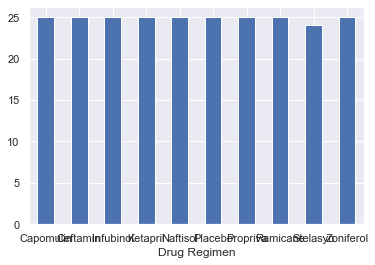

In [140]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

# x-axis =treatment y_axis=number of mice
time_points_df = clean_mouse_df.loc[:,['Drug Regimen','Timepoint']]
group_time_points_df = time_points_df.groupby('Drug Regimen').count()['Timepoint']
group_time_points_df
group_regimens_df = time_points_df.groupby('Drug Regimen')
group_regimens_df

print(len(group_time_points_df))
# Create a bar chart based upon the above data
#plt.bar(len(group_time_points_df), group_regimens_df, color="b", align="center")

ax = group_time_points_df.plot.bar(rot=0)

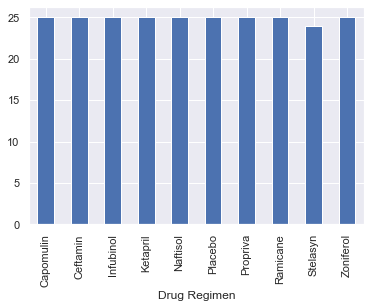

In [141]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

# x_axis = treatment/timeplot y-axis= number of mice
volume_mouse_df = clean_mouse_df.loc[:,['Drug Regimen','Tumor Volume (mm3)']]

result = clean_mouse_df.loc[:,['Drug Regimen']]
result
Drug_regimen = result.groupby(['Drug Regimen'])
regimen_count= len(Drug_regimen)

time_points_df = clean_mouse_df.loc[:,['Drug Regimen','Timepoint']]
group_time_points_df = time_points_df.groupby('Drug Regimen').count()['Timepoint']
group_time_points_df

group_time_points_df.plot(kind='bar', x='Drug Regimen', y='group_time_points_df')



## Pie Plots

C:\Users\c2c\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  from ipykernel import kernelapp as app


([<matplotlib.patches.Wedge at 0x22ad90bee10>,
 [Text(-0.7771287477781476, -0.9143691319028482, "('Female',          Sex  Timepoint\n19    Female         45\n29    Female         45\n94    Female         45\n134   Female         45\n144   Female         45\n...      ...        ...\n1857  Female          5\n1859  Female          5\n1862  Female         10\n1872  Female         45\n1882  Female         45\n\n[124 rows x 2 columns])"),
  Text(0.7123680187966355, 0.8381717042442776, "('Male',        Sex  Timepoint\n9     Male         45\n39    Male         45\n49    Male         45\n59    Male         45\n64    Male         20\n...    ...        ...\n1763  Male         45\n1797  Male         45\n1803  Male         25\n1855  Male         45\n1892  Male         45\n\n[125 rows x 2 columns])")],
 [Text(-0.4533251028705861, -0.5333819936099948, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

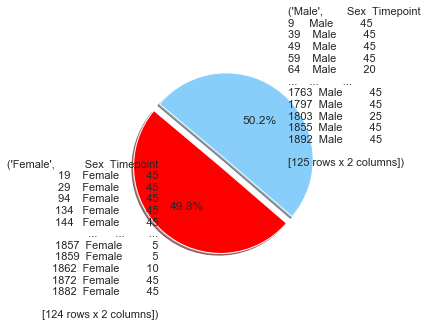

In [142]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

female_male_df = clean_mouse_df.loc[:,['Sex','Timepoint']]
groupfemale_male_df = female_male_df.groupby('Sex').count()
#groupfemale_male_df.head()

labels = female_male_df.groupby('Sex')
#labels
colors = ["red", "lightskyblue"]
explode = (0.1, 0)


# Automatically finds the percentages of each part of the pie chart
plt.pie(groupfemale_male_df, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)


C:\Users\c2c\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  # This is added back by InteractiveShellApp.init_path()


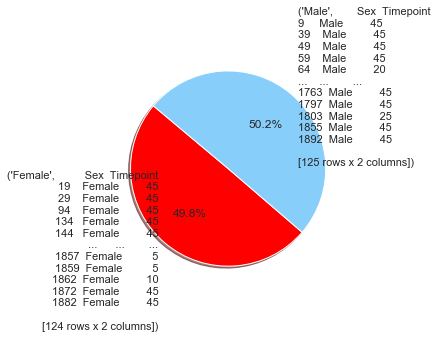

In [152]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
female_male_df = clean_mouse_df.loc[:,['Sex','Timepoint']]
groupfemale_male_df = female_male_df.groupby('Sex').count()
labels = female_male_df.groupby('Sex')
#labels
colors = ["red", "lightskyblue"]
explode = (0.1, 0)

#plt.pie(groupfemale_male_df, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)

plt.pie(groupfemale_male_df, explode=explode, labels=labels, colors=colors,autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.show()


## Quartiles, Outliers and Boxplots

In [144]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
qtr_regime_df = clean_mouse_df[(clean_mouse_df['Drug Regimen']=="Placebo") | (clean_mouse_df['Drug Regimen']=="Ramicane") | (clean_mouse_df['Drug Regimen']=="Naftisol") | (clean_mouse_df['Drug Regimen']=="Propriva")]
# df.quantile([.1, .25, .5, .75], axis = 0) 

placebo_qtr_df = clean_mouse_df[(clean_mouse_df['Drug Regimen']=="Placebo")]
print(placebo_qtr_df)
placebo_qtr_tumor_df= placebo_qtr_df.groupby('Drug Regimen')['Tumor Volume (mm3)']
placebo_qtr_tumor_df.head()

quartiles = placebo_qtr_tumor_df.quantile([0.25,0.5,0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")



     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
483      a262      Placebo  Female          17          29         45   
577      a897      Placebo    Male           7          28         45   
657      c282      Placebo    Male          12          27         45   
706      c757      Placebo    Male           9          27         45   
716      c766      Placebo  Female          13          26         45   
784      e227      Placebo    Male           1          30         45   
952      i477      Placebo  Female           3          30         10   
968      i669      Placebo  Female          18          27         25   
983      j235      Placebo    Male           6          30         20   
1163     l872      Placebo    Male          19          30          0   
1237     n763      Placebo  Female          16          25         40   
1267     o302      Placebo  Female           2          29         30   
1304     o795      Placebo  Female          20     

KeyError: 0.25

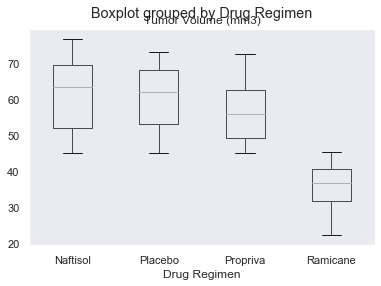

In [145]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# school_data_complete.loc[school_data_complete['Drug Regimen']=="Ramicane"]
# select 4 regimens

box_plot_regime = clean_mouse_df[(clean_mouse_df['Drug Regimen']=="Placebo") | (clean_mouse_df['Drug Regimen']=="Ramicane") | (clean_mouse_df['Drug Regimen']=="Naftisol") | (clean_mouse_df['Drug Regimen']=="Propriva")]
# print(box_plot_regime)

box_plot_regime.boxplot(by="Drug Regimen", column=['Tumor Volume (mm3)'], grid = False)

#box_plot_regRamicane_vol_df.boxplot(by="Drug Regimen", column=['Tumor Volume (mm3)'], grid = False)

# new_df = pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
#new_boxplot = pd.DataFrame([Ramicane_vol_df['Tumor Volume (mm3)'], Naftisol_df['Tumor Volume (mm3)'], Naftisol_df['Tumor Volume (mm3)']]).transpose()
# new_boxplot
# box_plot_reg = pd.DataFrame(Ramicane_vol_df,Naftisol_vol_df, Placebo_vol_df, how='left')

## Line and Scatter Plots

    Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
380     l509    Capomulin  Male          17          21         45   

     Tumor Volume (mm3)  Metastatic Sites  
380           41.483008                 3  
     Tumor Volume (mm3)  Timepoint
380           41.483008         45
      Tumor Volume (mm3)  Timepoint
231            45.000000          0
253            45.851193          5
539            46.759074         10
881            47.488599         15
982            48.070452         20
1146           44.006257         25
1414           44.708055         30
1499           40.207289         35
1723           40.770813         40
1771           41.483008         45


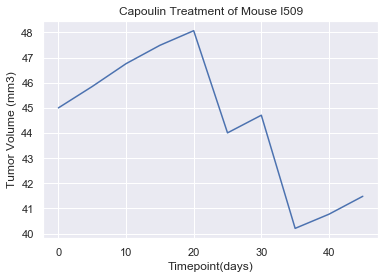

In [146]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

Capomulin_mouse_df = clean_mouse_df[(clean_mouse_df['Mouse ID']=="l509")]
print(Capomulin_mouse_df)
# Capomulin_mouse_df = Capomulin_df.loc[(Capomulin_df['Mouse ID']=="k403")]
Capomulin_df = Capomulin_mouse_df.loc[(Capomulin_mouse_df['Drug Regimen']=="Capomulin")]
Capomulin_df.head()


Capomulin_vol_df = Capomulin_mouse_df.loc[: ,['Tumor Volume (mm3)','Timepoint']]
print(Capomulin_vol_df)

# #years = average_unemployment.keys()

study_l509_df = study_results[(study_results['Mouse ID']=="l509")]

study_l509_df_plt = study_l509_df.loc[: ,['Tumor Volume (mm3)','Timepoint']]
print(study_l509_df_plt)

#lines_plot = study_l509_df_plt.plot.line()

plt.plot(study_l509_df_plt['Timepoint'], study_l509_df_plt['Tumor Volume (mm3)'])
plt.xlabel('Timepoint(days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capoulin Treatment of Mouse l509')
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


36.66756771920001
      Weight (g)  Tumor Volume (mm3)
19            17           23.343598
29            15           28.484033
39            17           28.430964
64            17           30.485985
104           17           31.023923
124           17           31.896238
134           17           32.377357
144           19           33.329098
164           17           34.455298
204           20           37.311846
224           21           36.041047
244           19           37.074024
282           19           38.846876
299           21           38.939633
309           22           38.982878
317           21           38.753265
337           23           38.125164
340           23           39.952347
350           21           40.658124
360           22           40.159220
370           23           40.728578
380           21           41.483008
390           25           41.581521
440           24           47.685963
1455          25           46.539206


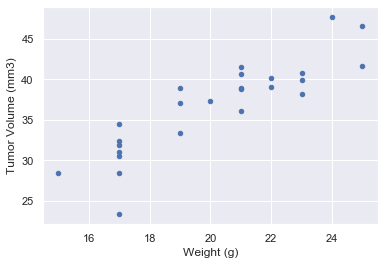

In [147]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

Capomulin_df = clean_mouse_df.loc[clean_mouse_df['Drug Regimen']=="Capomulin"]
Capomulin_df
Capomulin_vol_df = Capomulin_df.loc[: ,['Weight (g)','Tumor Volume (mm3)']]

ave_tumer_vol = Capomulin_df['Tumor Volume (mm3)'].mean()
print(ave_tumer_vol)

print(Capomulin_vol_df)
Capomulin_vol_df.plot(kind = 'scatter', x = 'Weight (g)', y = 'Tumor Volume (mm3)')


## Correlation and Regression

In [148]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin_vol_df.corr(method ='pearson') 

data1 = Capomulin_vol_df['Weight (g)']
data2 = Capomulin_vol_df['Tumor Volume (mm3)']

#corr, _ = Capomulin_vol_df['Weight (g)', 'Tumor Volume (mm3)']
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.877


In [150]:
#linear regression model
X = Capomulin_vol_df.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = Capomulin_vol_df.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions


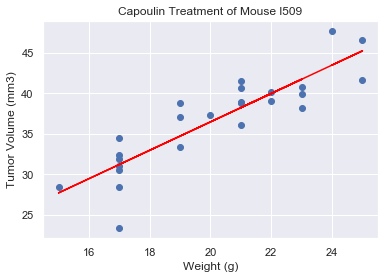

In [151]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Capoulin Treatment of Mouse l509')
plt.show()